In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import seaborn as sns
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tiktok-what-s-trending-and-why/omnibuslaw_videos.csv
/kaggle/input/tiktok-what-s-trending-and-why/tiktok_liked_videos.csv
/kaggle/input/tiktok-what-s-trending-and-why/washingtonpost_videos.csv
/kaggle/input/tiktok-what-s-trending-and-why/trending.csv


In [10]:
df= pd.read_csv('/kaggle/input/tiktok-what-s-trending-and-why/trending.csv')

In [11]:
df.head()

,user_name,user_id,video_id,video_desc,video_time,video_length,video_link,n_likes,n_shares,n_comments,n_plays
0,virvirlogo,6850363964103787522,6870517816395599105,Jangan berbohong kalian kaum hawa #fypシ #foryo...,1599667090,17,https://www.tiktok.com/@virvirlogo/video/68705...,37300,190,299,430000
1,fighaaa,6710981038585250818,6881467654993988865,#jegalsampaigagal #mahasiswaindonesia #mahasis...,1602216546,34,https://www.tiktok.com/@fighaaa/video/68814676...,114900,789,1761,566900
2,cathyychang,6781377328532325377,6881237013593476353,thank you UPH🥺💖 #racunintiktok #tiktokindonesi...,1602162845,51,https://www.tiktok.com/@cathyychang/video/6881...,104200,1316,1039,576700
3,miraaa336,6515089076041940994,6874450585047878914,#duet dengan @yosattt #magicscan #AXISERUINAJA...,1600582758,9,https://www.tiktok.com/@miraaa336/video/687445...,1789,3,9,103800
4,pratiwi0421,6796618738764792834,6862641405672590594,learn from master @psdn_98 @naruto0919 #finger...,1597833226,13,https://www.tiktok.com/@pratiwi0421/video/6862...,2925,41,45,129600


In [18]:
df.describe()

,user_id,video_id,video_time,video_length,n_likes,n_shares,n_comments,n_plays
count,2.000000e+01,2.000000e+01,2.000000e+01,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,6.390061e+18,6.870148e+18,1.599581e+09,18.650000,34428.150000,948.250000,479.150000,3.703296e+05
std,1.507381e+18,9.821841e+15,2.286822e+06,14.492375,47635.546509,3165.130244,705.446799,5.735112e+05
min,7.417626e+10,6.852112e+18,1.595382e+09,7.000000,223.000000,0.000000,0.000000,4.092000e+03
25%,6.645310e+18,6.862150e+18,1.597719e+09,10.750000,1722.250000,5.250000,32.750000,8.122500e+04
50%,6.735814e+18,6.872464e+18,1.600120e+09,12.500000,13850.000000,85.500000,159.500000,1.952000e+05
75%,6.797080e+18,6.878190e+18,1.601454e+09,17.000000,37475.000000,373.250000,456.000000,4.262500e+05
max,6.861057e+18,6.881468e+18,1.602217e+09,59.000000,159700.000000,14300.000000,2453.000000,2.600000e+06


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_name     20 non-null     object
 1   user_id       20 non-null     int64 
 2   video_id      20 non-null     int64 
 3   video_desc    18 non-null     object
 4   video_time    20 non-null     int64 
 5   video_length  20 non-null     int64 
 6   video_link    20 non-null     object
 7   n_likes       20 non-null     int64 
 8   n_shares      20 non-null     int64 
 9   n_comments    20 non-null     int64 
 10  n_plays       20 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 1.8+ KB


In [16]:
df.head()

,user_name,user_id,video_id,video_desc,video_time,video_length,video_link,n_likes,n_shares,n_comments,n_plays
0,virvirlogo,6850363964103787522,6870517816395599105,Jangan berbohong kalian kaum hawa #fypシ #foryo...,1599667090,17,https://www.tiktok.com/@virvirlogo/video/68705...,37300,190,299,430000
1,fighaaa,6710981038585250818,6881467654993988865,#jegalsampaigagal #mahasiswaindonesia #mahasis...,1602216546,34,https://www.tiktok.com/@fighaaa/video/68814676...,114900,789,1761,566900
2,cathyychang,6781377328532325377,6881237013593476353,thank you UPH🥺💖 #racunintiktok #tiktokindonesi...,1602162845,51,https://www.tiktok.com/@cathyychang/video/6881...,104200,1316,1039,576700
3,miraaa336,6515089076041940994,6874450585047878914,#duet dengan @yosattt #magicscan #AXISERUINAJA...,1600582758,9,https://www.tiktok.com/@miraaa336/video/687445...,1789,3,9,103800
4,pratiwi0421,6796618738764792834,6862641405672590594,learn from master @psdn_98 @naruto0919 #finger...,1597833226,13,https://www.tiktok.com/@pratiwi0421/video/6862...,2925,41,45,129600


In [27]:
df= df.drop(columns=['user_name'])

In [28]:
df.head()

,user_id,n_likes,n_shares,n_comments,n_plays
0,6850363964103787522,37300,190,299,430000
1,6710981038585250818,114900,789,1761,566900
2,6781377328532325377,104200,1316,1039,576700
3,6515089076041940994,1789,3,9,103800
4,6796618738764792834,2925,41,45,129600


In [37]:
df['n_likes'].min()


223

In [38]:
df['n_likes'].max()

159700

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='n_likes', ylabel='n_shares'>

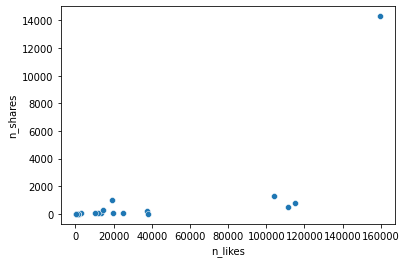

In [32]:
sns.scatterplot(df['n_likes'],df['n_shares'])

In [47]:
df.head()

,user_id,n_likes,n_shares,n_comments,n_plays
0,6850363964103787522,37300,190,299,430000
1,6710981038585250818,114900,789,1761,566900
2,6781377328532325377,104200,1316,1039,576700
3,6515089076041940994,1789,3,9,103800
4,6796618738764792834,2925,41,45,129600


In [53]:
x=df.iloc[:,0:4]


In [54]:
x

,user_id,n_likes,n_shares,n_comments
0,6850363964103787522,37300,190,299
1,6710981038585250818,114900,789,1761
2,6781377328532325377,104200,1316,1039
3,6515089076041940994,1789,3,9
4,6796618738764792834,2925,41,45
5,6671433503026675713,19800,108,176
6,6790153254766281730,13200,84,386
7,74176257373,111300,521,2453
8,6654557946088112130,38000,31,35
9,6584929978894958594,24900,87,82


In [55]:
y=df.iloc[:,-1]

In [56]:
y

0      430000
1      566900
2      576700
3      103800
4      129600
5      361200
6      118800
7      848600
8      298200
9      370400
10      70200
11     260800
12      11100
13      13800
14      15600
15       4092
16     425000
17    2600000
18      84900
19     116900
Name: n_plays, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [62]:
x_train.shape

(16, 4)

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler=StandardScaler()

In [65]:
x_train_scaled=scaler.fit_transform(x_train)

In [66]:
x_train_scaled

array([[ 0.22362789, -0.39383647, -0.30614757, -0.48070829],
       [ 0.21328389, -0.03278365, -0.32867751, -0.66839917],
       [ 0.28842055, -0.78081765, -0.33774801, -0.71498911],
       [ 0.15729455, -0.76177311, -0.33716281, -0.71498911],
       [ 0.30993867, -0.78220632, -0.33745541, -0.71232682],
       [ 0.33450714, -0.58428192, -0.30790315, -0.12529365],
       [-3.86567759,  1.42134669, -0.18530514,  2.55029975],
       [ 0.29101879,  1.28049641,  0.04730923,  0.66806639],
       [ 0.27150876, -0.76167392, -0.33599243, -0.59518642],
       [ 0.19060905, -0.54658959, -0.32458116, -0.52463594],
       [ 0.24786885,  1.49276374, -0.10688923,  1.62915018],
       [ 0.1277954 , -0.7511399 , -0.33687022, -0.70300884],
       [ 0.23627892, -0.40573931, -0.04105497, -0.20915553],
       [ 0.33985932,  2.38150915,  3.84638455,  1.57324226],
       [ 0.33330467, -0.04667029, -0.28215464, -0.31697795],
       [ 0.30036113, -0.72860386, -0.32575154, -0.65508776]])

In [68]:
x_test_scaled=scaler.transform(x_test)

In [69]:
x_test_scaled

array([[ 0.17060491, -0.29266233, -0.3122921 , -0.60583554],
       [ 0.29639806, -0.52476772, -0.31316989, -0.20116868],
       [ 0.30149207, -0.49897823, -0.24294668, -0.05607431],
       [ 0.25467212, -0.75643667, -0.33745541, -0.68037944]])

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
lr=LogisticRegression()

In [104]:
lr.fit(x_train_scaled,y_train)

LogisticRegression()

In [105]:
y_pred=lr.predict(x_test_scaled)

In [106]:
from sklearn.metrics import r2_score

In [107]:
r2_score(y_test,y_pred)

0.8903864824822292